#Email spam detection

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Projects /Dataset/SMSSpamCollection.txt', sep='\t', header=None, names=['label','text'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Cleaning

In [ ]:
df.sample(5)

,label,text
346,ham,Gudnite....tc...practice going on
3121,ham,Good evening! this is roger. How are you?
1683,ham,HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...
3205,ham,She's good. How are you. Where r u working now
243,ham,"Okay. No no, just shining on. That was meant t..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#encoding the value so model can process it
le=LabelEncoder()

In [ ]:
df['label']=le.fit_transform(df['label'])

In [ ]:
df.sample(5)

,label,text
1298,0,"K so am I, how much for an 8th? Fifty?"
4052,0,"Motivate Behind every darkness, there is a shi..."
3494,0,"Cool, text me when you head out"
5,1,FreeMsg Hey there darling it's been 3 week's n...
765,0,"Wishing you and your family Merry ""X"" mas and ..."


In [ ]:
#checking duplicates
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

#EDA

In [ ]:
 df['label'].value_counts()

,count
label,
0,4516
1,653


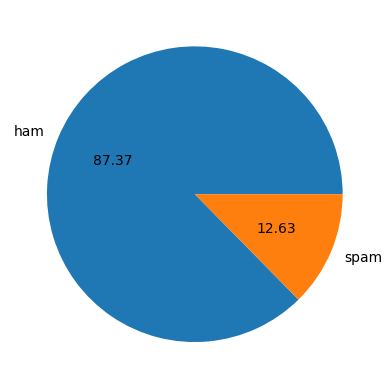

In [ ]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
#no of characters
df['num_char']=df['text'].apply(len)

In [ ]:
#no of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
#no of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
  #for ham
df[df['label'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
  #for spam
  df[df['label'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

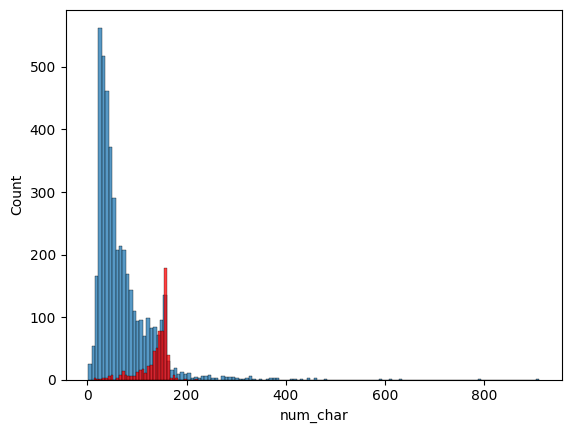

In [ ]:
sns.histplot(df[df['label']==0]['num_char'])
sns.histplot(df[df['label']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

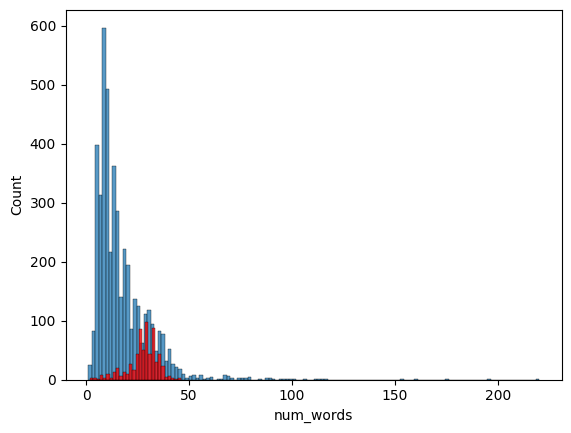

In [ ]:
sns.histplot(df[df['label']==0]['num_words'])
sns.histplot(df[df['label']==1]['num_words'],color='red')

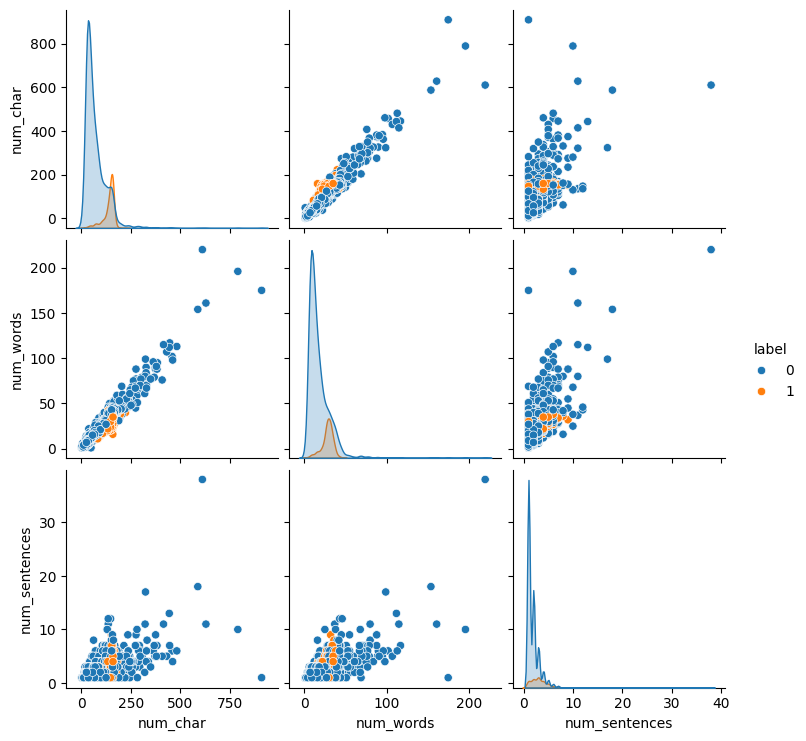

In [ ]:
sns.pairplot(df,hue='label')

In [ ]:
df1=df.drop(columns=['text'])

In [ ]:
df.head(5)

,label,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
  df1.corr()

,label,num_char,num_words,num_sentences
label,1.000000,0.379791,0.260168,0.263826
num_char,0.379791,1.000000,0.966003,0.622580
num_words,0.260168,0.966003,1.000000,0.679142
num_sentences,0.263826,0.622580,0.679142,1.000000


<Axes: >

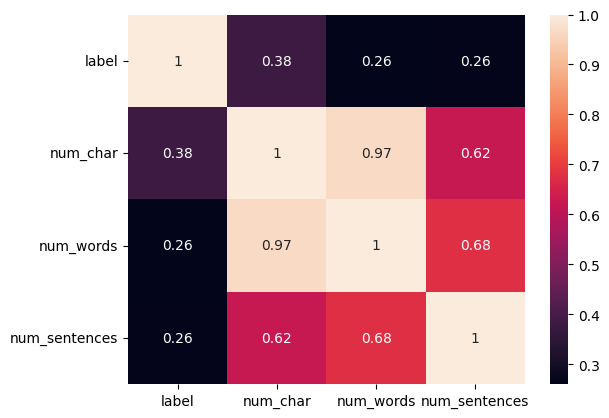

In [ ]:
sns.heatmap(df1.corr(),annot=True)

#Data Preprocessing

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english')  and i not in string.punctuation:
        y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['Transformed_text'] =df['text'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc= wc.generate(df[df['label']==1]['Transformed_text'].str.cat(sep=" "))

In [ ]:
ham_wc= wc.generate(df[df['label']==0]['Transformed_text'].str.cat(sep=" "))

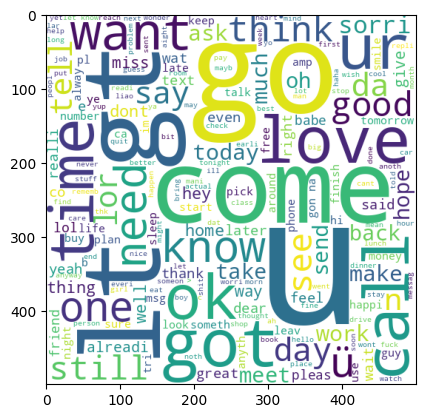

In [ ]:
plt.imshow(spam_wc)

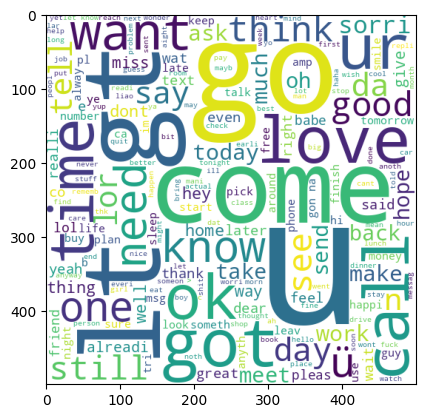

In [ ]:
plt.imshow(ham_wc)

In [ ]:
df.sample(5)

,label,text,num_char,num_words,num_sentences,Transformed_text
4267,0,The greatest test of courage on earth is to be...,85,17,1,greatest test courag earth bear defeat without...
5245,0,Thank you princess! I want to see your nice ju...,58,13,2,thank princess want see nice juici booti
2164,0,hi my darlin im on my way to London and we hav...,158,38,4,hi darlin im way london smash anoth driver big...
2221,0,But really quite funny lor wat... Then u shd h...,76,16,1,realli quit funni lor wat u shd haf run shorte...
3577,0,The sign of maturity is not when we start sayi...,154,32,2,sign matur start say big thing actual start un...


In [ ]:
print(df['label'].value_counts())

label
0    4516
1     653
Name: count, dtype: int64


In [ ]:
spam_corpus=[]
for msg in df[df['label']==1]['Transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9982

In [ ]:
ham_corpus=[]
for msg in df[df['label']==0]['Transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35939

#Model building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
x=tfidf.fit_transform(df['Transformed_text']).toarray()

In [ ]:
"""from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x = scaler.fit_transform(x)"""

'from sklearn.preprocessing import MinMaxScaler\nscaler=MinMaxScaler()\nx = scaler.fit_transform(x)'

In [ ]:
x.shape

(5169, 3000)

In [ ]:
y=df['label'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[796 115]
 [ 15 108]]
0.484304932735426


In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9825918762088974
[[911   0]
 [ 18 105]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[909   2]
 [ 19 104]]
0.9811320754716981


In [ ]:
"""import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))"""